In [35]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import auc
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('dataset/credit-a.csv',header=None)

In [5]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,30.83,0.000,0,0,9,0,1.25,0,0,1,1,0,202,0.0,-1
1,1,58.67,4.460,0,0,8,1,3.04,0,0,6,1,0,43,560.0,-1
2,1,24.50,0.500,0,0,8,1,1.50,0,1,0,1,0,280,824.0,-1
3,0,27.83,1.540,0,0,9,0,3.75,0,0,5,0,0,100,3.0,-1
4,0,20.17,5.625,0,0,9,0,1.71,0,1,0,1,2,120,0.0,-1


In [7]:
rename = dict()
for col in data.columns:
    rename[col]='f'+str(col)

In [9]:
rename[15]='y'

In [10]:
data.rename(columns=rename,inplace=True)

In [12]:
data['y'].value_counts()

 1    357
-1    296
Name: y, dtype: int64

In [15]:
x = data.iloc[:,:-1]
y = data['y']
y = y.map(lambda x: 0 if x==-1 else x)

In [25]:
model = tf.keras.Sequential()

In [26]:
model.add(tf.keras.layers.Dense(10,input_shape=(15,),activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,
             metrics=['acc'])

In [30]:
history = model.fit(x,y,epochs=100)

Train on 653 samples
Epoch 1/100
653/653 [==============================] - 0s 399us/sample - loss: 9.2100 - acc: 0.3369
Epoch 2/100
653/653 [==============================] - 0s 63us/sample - loss: 7.7967 - acc: 0.3446
Epoch 3/100
653/653 [==============================] - 0s 67us/sample - loss: 4.9354 - acc: 0.5207
Epoch 4/100
653/653 [==============================] - 0s 67us/sample - loss: 4.7624 - acc: 0.4946
Epoch 5/100
653/653 [==============================] - 0s 55us/sample - loss: 3.4233 - acc: 0.5528
Epoch 6/100
653/653 [==============================] - 0s 69us/sample - loss: 2.6071 - acc: 0.6294
Epoch 7/100
653/653 [==============================] - 0s 65us/sample - loss: 2.4844 - acc: 0.6585
Epoch 8/100
653/653 [==============================] - 0s 51us/sample - loss: 2.4451 - acc: 0.6677
Epoch 9/100
653/653 [==============================] - 0s 69us/sample - loss: 2.4094 - acc: 0.6738
Epoch 10/100
653/653 [==============================] - 0s 77us/sample - loss: 2.3980 -

653/653 [==============================] - 0s 80us/sample - loss: 0.4914 - acc: 0.8009
Epoch 82/100
653/653 [==============================] - 0s 59us/sample - loss: 0.5007 - acc: 0.8055
Epoch 83/100
653/653 [==============================] - 0s 61us/sample - loss: 0.4689 - acc: 0.8193
Epoch 84/100
653/653 [==============================] - 0s 60us/sample - loss: 0.4894 - acc: 0.8086
Epoch 85/100
653/653 [==============================] - 0s 54us/sample - loss: 0.4864 - acc: 0.8162
Epoch 86/100
653/653 [==============================] - 0s 66us/sample - loss: 0.4778 - acc: 0.8055
Epoch 87/100
653/653 [==============================] - 0s 64us/sample - loss: 0.4570 - acc: 0.8239
Epoch 88/100
653/653 [==============================] - 0s 65us/sample - loss: 0.4652 - acc: 0.8208
Epoch 89/100
653/653 [==============================] - 0s 62us/sample - loss: 0.4554 - acc: 0.8224
Epoch 90/100
653/653 [==============================] - 0s 65us/sample - loss: 0.4579 - acc: 0.8193
Epoch 91/100


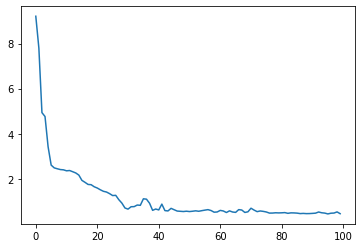

In [38]:
plt.plot(history.epoch,history.history.get('loss'))

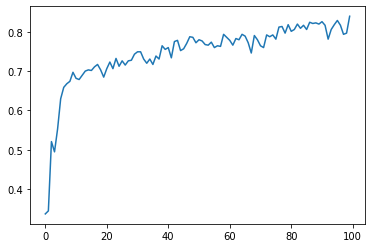

In [40]:
plt.plot(history.epoch,history.history['acc'])